<a href="https://colab.research.google.com/github/shreyaaaaaa21/Face_Recognition_System/blob/main/FACE_REGOCNITION_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import os
import cv2
import numpy as np


In [22]:
def prepare_training_data(data_folder_path):
    dirs = os.listdir(data_folder_path)
    faces = []
    labels = []
    label_map = {}
    label_count = 0

    for dir_name in dirs:
        if not dir_name.startswith("."):  # Skip system files
            label = label_map.get(dir_name, label_count)
            if label == label_count:
                label_map[dir_name] = label_count
                label_count += 1

            subject_dir_path = data_folder_path + "/" + dir_name
            subject_images_names = os.listdir(subject_dir_path)

            for image_name in subject_images_names:
                if image_name.startswith("."):
                    continue

                image_path = subject_dir_path + "/" + image_name
                image = cv2.imread(image_path)

                if image is None:
                    print(f"Failed to load image: {image_path}")
                    continue
                else:
                    print(f"Loaded image: {image_path}")

                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
                faces_rect = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)

                if len(faces_rect) == 0:
                    print(f"No face detected in image: {image_path}")
                else:
                    for (x, y, w, h) in faces_rect:
                        faces.append(gray[y:y+w, x:x+h])
                        labels.append(label)

    print(f"Label map: {label_map}")  # Debug: Print out the label map
    print(f"Total faces: {len(faces)}")
    print(f"Total labels: {len(labels)}")

    return faces, np.array(labels), label_map


In [23]:
# Training data folder path
training_data_folder_path = "/content/sample_data/training_data_folder"  # Adjust this to your actual path
faces, labels, label_map = prepare_training_data(training_data_folder_path)

# Summary of dataset preparation
print("Data preparation complete")
print(f"Total faces for training: {len(faces)}")
print(f"Total labels for training: {len(labels)}")


Loaded image: /content/sample_data/training_data_folder/Natalie Portman/Natalie Portman_12.jpg
No face detected in image: /content/sample_data/training_data_folder/Natalie Portman/Natalie Portman_12.jpg
Loaded image: /content/sample_data/training_data_folder/Natalie Portman/Natalie Portman_1.jpg
Loaded image: /content/sample_data/training_data_folder/Natalie Portman/Natalie Portman_13.jpg
No face detected in image: /content/sample_data/training_data_folder/Natalie Portman/Natalie Portman_13.jpg
Loaded image: /content/sample_data/training_data_folder/Natalie Portman/Natalie Portman_14.jpg
No face detected in image: /content/sample_data/training_data_folder/Natalie Portman/Natalie Portman_14.jpg
Loaded image: /content/sample_data/training_data_folder/Natalie Portman/Natalie Portman_0.jpg
No face detected in image: /content/sample_data/training_data_folder/Natalie Portman/Natalie Portman_0.jpg
Loaded image: /content/sample_data/training_data_folder/Natalie Portman/Natalie Portman_3.jpg
Lo

In [24]:
# Train the recognizer
recognizer = cv2.face.LBPHFaceRecognizer_create()

if len(faces) > 0 and len(labels) > 0:
    recognizer.train(faces, labels)
    print("Training complete.")
else:
    print("No training data found. Check if images are properly loaded and faces detected.")


Training complete.


In [25]:
def predict(test_img):
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.2, minNeighbors=5)

    if len(faces) == 0:
        print("No faces detected in test image")
        return test_img

    for (x, y, w, h) in faces:
        label, confidence = recognizer.predict(gray_img[y:y+w, x:x+h])

        # Debug: Print the predicted label and confidence
        print(f"Predicted label: {label}, Confidence: {confidence}")

        # Check if the label exists in the label map
        if label in label_map.values():
            predicted_name = list(label_map.keys())[list(label_map.values()).index(label)]
        else:
            predicted_name = "Unknown"

        # Draw rectangle and add the predicted name on the test image
        cv2.rectangle(test_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(test_img, predicted_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    return test_img


Predicted label: 1, Confidence: 93.70228072984916
Predicted label: 0, Confidence: 92.52615772906653


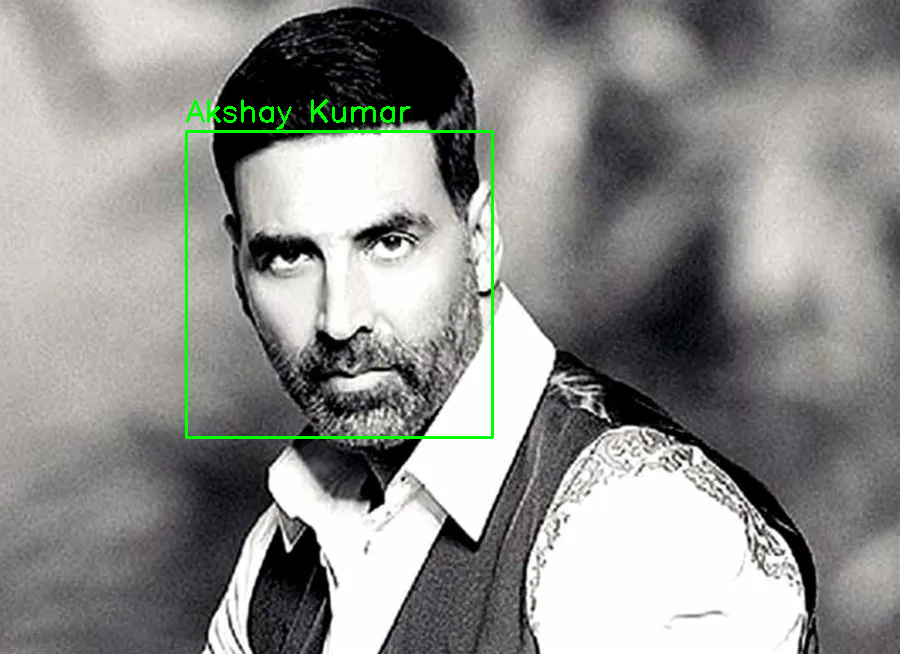

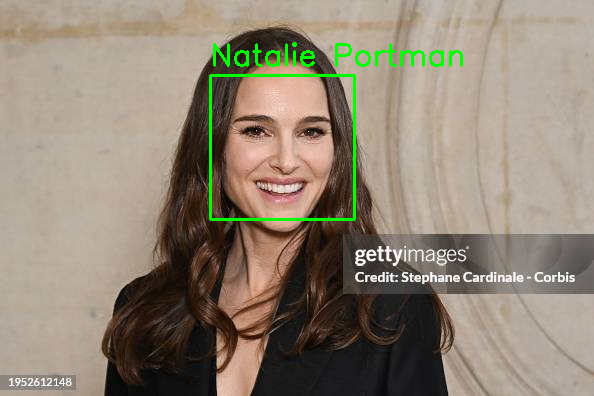

In [26]:
# Load test images
test_img1 = cv2.imread("/content/sample_data/test_images_folder/test1.jpg")
test_img2 = cv2.imread("/content/sample_data/test_images_folder/test2.jpg")

# Debugging: Check if test images loaded properly
if test_img1 is None:
    print("Failed to load test image 1")
if test_img2 is None:
    print("Failed to load test image 2")

# Predict using the trained model
predicted_img1 = predict(test_img1)
predicted_img2 = predict(test_img2)

# Display the predicted images using cv2_imshow (since cv2.imshow is disabled in Colab)
from google.colab.patches import cv2_imshow
cv2_imshow(predicted_img1)
cv2_imshow(predicted_img2)
